# 30000 Spotify Songs Dataset

### 1) Definisati u 2-3 rečenice problem koji će se u projektu rešavati.
- Ovaj projekat će se baviti problemom praćenja trendova u muzici. Svodi se na predikciju popularnosti neke pesme po određenim karakteristikama koje je opisuju.

### 3) Jednom rečenicom objasniti šta predstavlja jedan uzorak u konkretnoj bazi.
- Jedan uzorak u bazi pretstavlja opšte informacije o pesmi dobijene sa aplikacije *Spotify*, njene karakteristike i informacije o njnoj uspešnosti.

### 5) Navesti sva obeležja.
- Id pesme (type:string)
- Ime pesme (type:string)
- Izvođač (type:string)
- Datum kada je podatak povučen sa Spotify API (type:string)
- Mera popularnosti date pesme u tom momentu (type:int)
- Bool vrednost koja govori da li pesma sadrži eksplicitan tekst (type:bool)
- Dužina pesme data u ms (type:int)
- Ime albuma (type:string)
- Ime playliste iz koje je povučena pesma (type:string)
- Id plazliste iz koje je povučena pesma (type:string)
- Datum kada je album objavljen (type:string)
- Mera koliko je pesma ritmična (type:float)
- Mera koliko je pesma energična (type:float)
- Tonalitet pesme (type:int)
- Glasnoća pesme (type:float)
- Broj koji predstavlja da li je pesma u duru ili molu (type:int)
- Mera prisustva izgovorenih reči u pesmi (type:float)
- Mera kvaliteta akustike u pesmi (type:float)
- Koliko ima čistog instrumentala u pesmi (type:float)
- Mera prisustva publike u pesmi (type:float)
- Mera toga koliko je pesma pozitivna (type:float)
- Tempo pesme dat u BPM (type:float)
- Vremenski potpis pesme (type:int)




In [587]:
import pandas as pd

songs = pd.read_csv('spotify_songs.csv')
songs.columns.size
print(songs['track_name'].value_counts())
print(songs['track_name'].unique())

track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64
["I Don't Care (with Justin Bieber) - Loud Luxury Remix"
 'Memories - Dillon Francis Remix' 'All the Time - Don Diablo Remix' ...
 'Sweet Surrender - Radio Edit' 'Only For You - Maor Levi Remix'
 'Typhoon - Original Mix']


### 7) Ako ima kategoričkih obeležja, navesti koji od njih ima najmanji broj kategorija i koje su, i navesti ono koje ima najveći broj kategorija i koliko ih ima.
- Najmanji broj kategorija ima kategoričko obeležje mode koje nam govori da li je u duru ili u molu (0 ili 1). A najveći broj kategorija ima obeležje track_name koje ima 23449 kategorija.

In [588]:
songs['mode'].value_counts()

mode
1    18574
0    14259
Name: count, dtype: int64

### 9) Da li postoje obeležja u bazi koja smatraš da treba izbaciti iz baze? Koja su to i zašto smatraš da ih treba izbaciti? 
- track_id (Id pesme) - Nije nam potreban za bilo kakvu analizu i unikatan je za svaki primerak
- track_name (Ime pesme) - Ima previše unikatnih vrednosti pa nam nije od koristi u daljoj analizi
- track_artist (Izvođač pesme) - Bio bi preveliki bias prema određenim izvođačima. To je problem jer želimo da predviđamo uspeh i nepoznatih izvođača.
- track_album_id i track_album_name (Id albuma i ime albuma) tokođe nisu objektivni pokazatelji popularnosti neke pesme.
- playlist_name i playlist_id (Ime playliste i id playliste iz koje je uzeta pesma) - nisu nam potrebni za dalju analizu.

### 13) Kada je završeno izbacivanje, dopuna, i drugo, navesti koliko je u sređenoj bazi ostalo uzoraka, a koliko obeležja. 
- Ostaje nam 32833 uzoraka i 16 obeležja

In [589]:
new_df = songs.copy()

In [590]:
# Assuming 'date' is a string column in the format 'YYYY-MM-DD'
new_df[['year', 'month', 'day']] = new_df['track_album_release_date'].str.split('-', expand=True)

# Convert the columns to numeric (to handle missing values during median calculation)
new_df['year'] = pd.to_numeric(new_df['year'], errors='coerce', downcast='integer')
new_df['month'] = pd.to_numeric(new_df['month'], errors='coerce', downcast='integer')
new_df['day'] = pd.to_numeric(new_df['day'], errors='coerce', downcast='integer')

# Calculate median values for year, month, and day
median_year = int(new_df['year'].median())
median_month = int(new_df['month'].median())
median_day = int(new_df['day'].median())

# Fill missing values with median values
new_df['year'] = new_df['year'].fillna(median_year).astype(int)
new_df['month'] = new_df['month'].fillna(median_month).astype(int)
new_df['day'] = new_df['day'].fillna(median_day).astype(int)
coumns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'track_album_release_date', 'instrumentalness']
songs = new_df.copy()
songs.drop(columns=coumns_to_drop, inplace=True)
songs.dropna(inplace=True, axis=0)

playlist_gere_count = songs['playlist_genre'].value_counts()
playlist_subgenre_count = songs['playlist_subgenre'].value_counts() 

songs['playlist_genre'] = songs['playlist_genre'].map(playlist_gere_count)
songs['playlist_subgenre'] = songs['playlist_subgenre'].map(playlist_subgenre_count)


songs.head()




,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,year,month,day
0,66,5507,1298,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.0653,0.518,122.036,194754,2019,6,14
1,67,5507,1298,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.3570,0.693,99.972,162600,2019,12,13
2,70,5507,1298,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.1100,0.613,124.008,176616,2019,7,5
3,60,5507,1298,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.2040,0.277,121.956,169093,2019,7,19
4,69,5507,1298,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.0833,0.725,123.976,189052,2019,3,5


In [591]:

y = songs['track_popularity']
x = songs.drop(columns=['track_popularity'])

### 15) Da li postoje parovi obeležja korelisani više od 0.7? Navesti takve parove obeležja. 
- Postoji samo jedna korelisanost blizu 0.7 a to je između loudness i energy (Glasnoće i Energičnosti) koja iznosi 0.68.

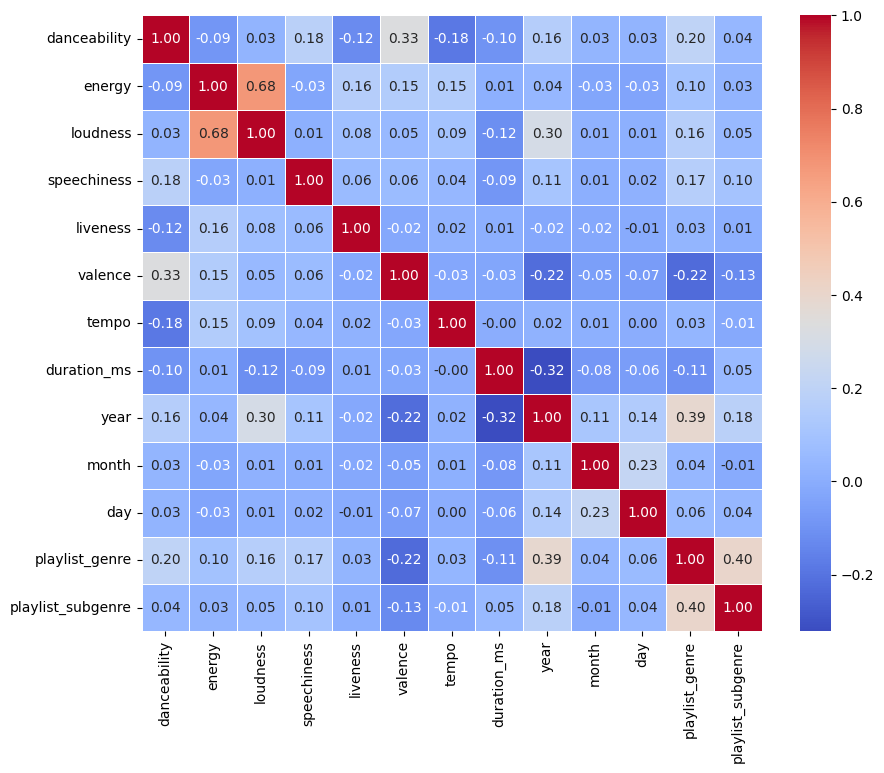

In [592]:
numerical_feats = ['danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'month', 'day', 'playlist_genre', 'playlist_subgenre']
dummy_feats = [feat for feat in x.columns if feat not in numerical_feats]
numeric_values = songs[numerical_feats]
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = numeric_values.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()
#TODO



Column: danceability
Number of outliers: 291
Percentage of outliers: 0.89%



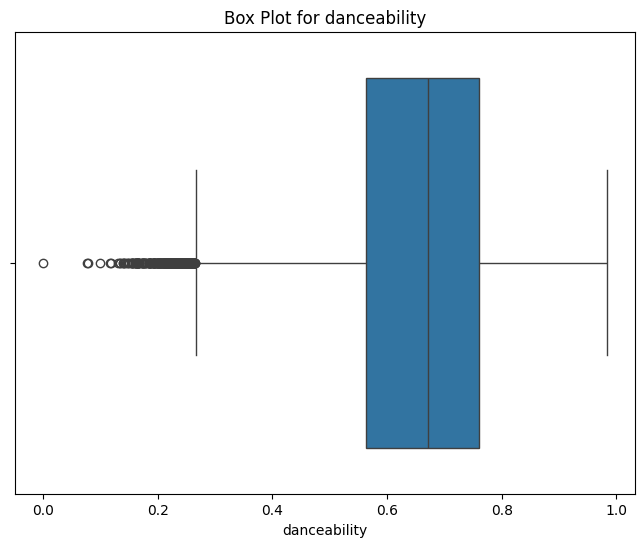

Column: energy
Number of outliers: 277
Percentage of outliers: 0.84%



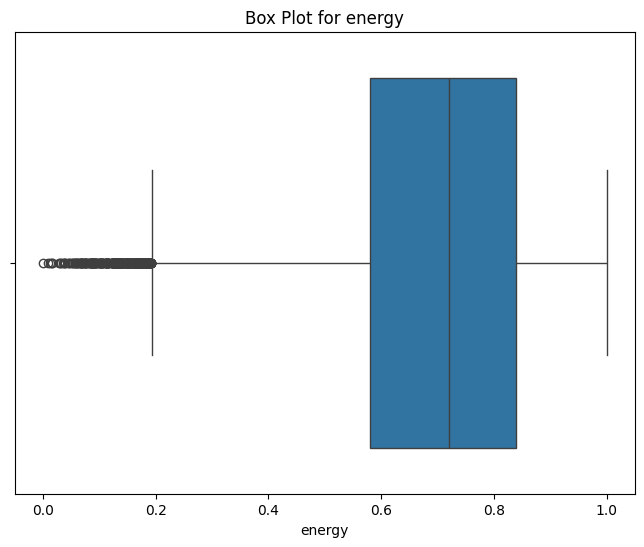

Column: loudness
Number of outliers: 1021
Percentage of outliers: 3.11%



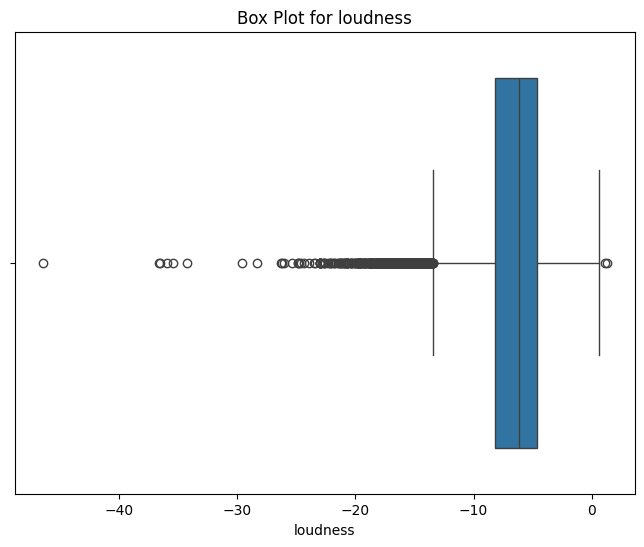

Column: speechiness
Number of outliers: 3176
Percentage of outliers: 9.67%



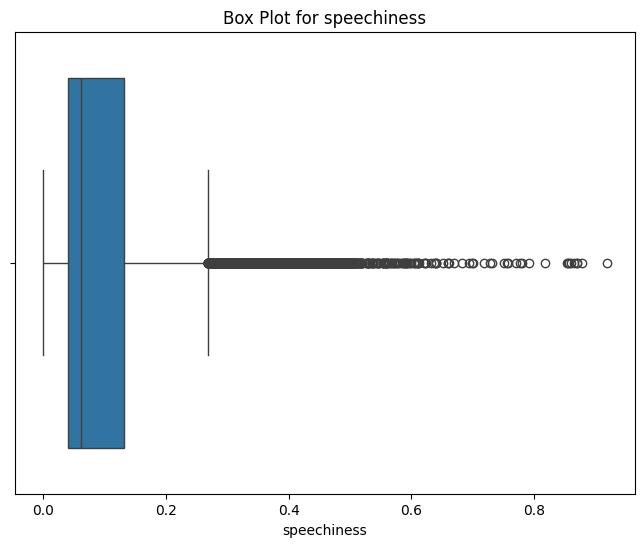

Column: liveness
Number of outliers: 1843
Percentage of outliers: 5.61%



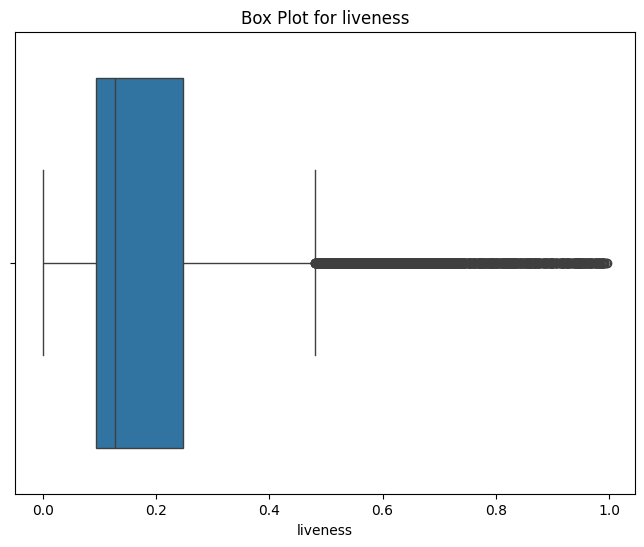

Column: valence
Number of outliers: 0
Percentage of outliers: 0.00%



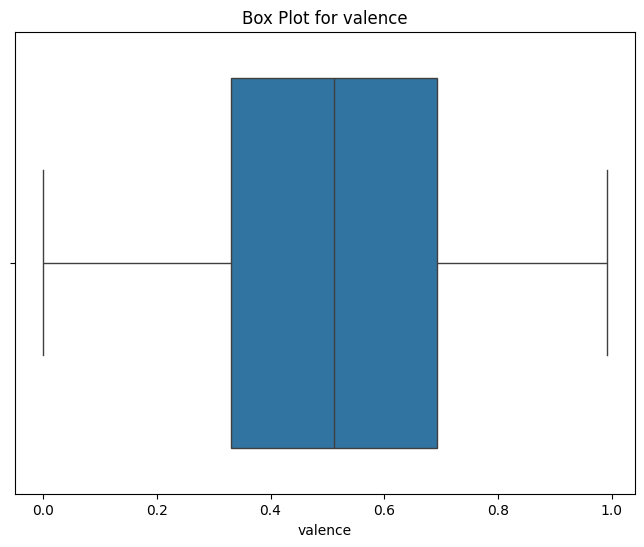

Column: tempo
Number of outliers: 571
Percentage of outliers: 1.74%



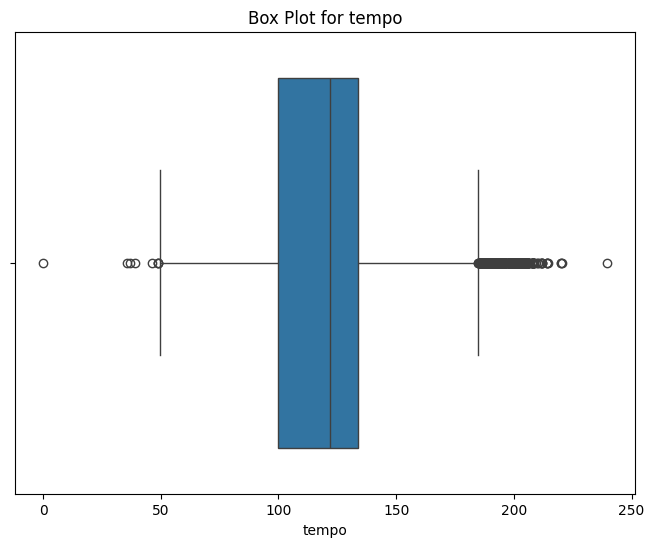

Column: duration_ms
Number of outliers: 1387
Percentage of outliers: 4.22%



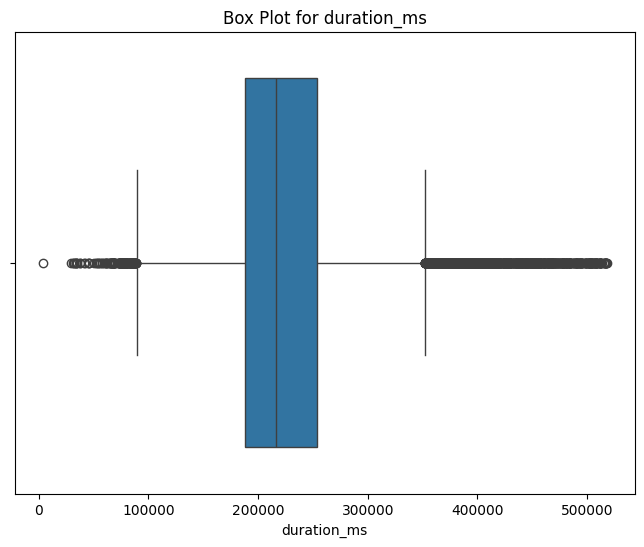

Column: year
Number of outliers: 2827
Percentage of outliers: 8.61%



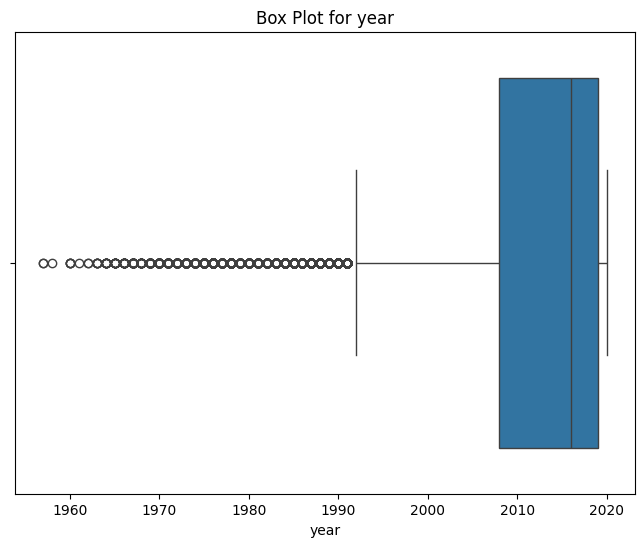

Column: month
Number of outliers: 0
Percentage of outliers: 0.00%



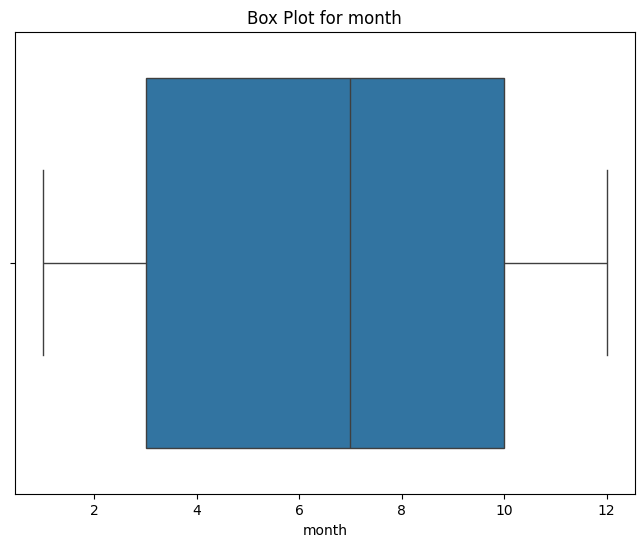

Column: day
Number of outliers: 0
Percentage of outliers: 0.00%



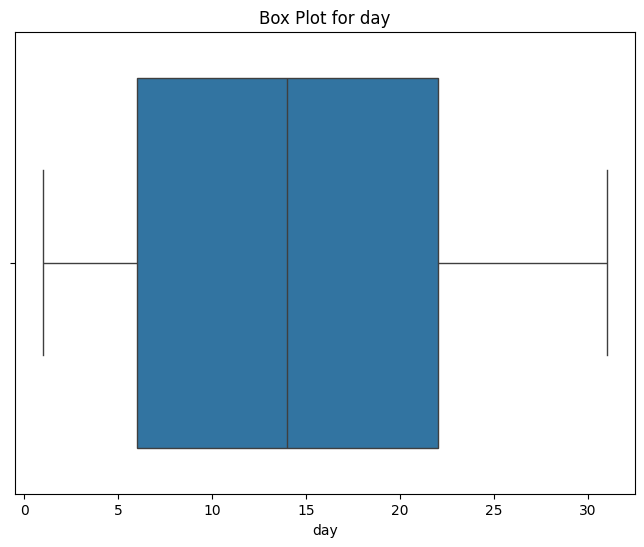

Column: playlist_genre
Number of outliers: 0
Percentage of outliers: 0.00%



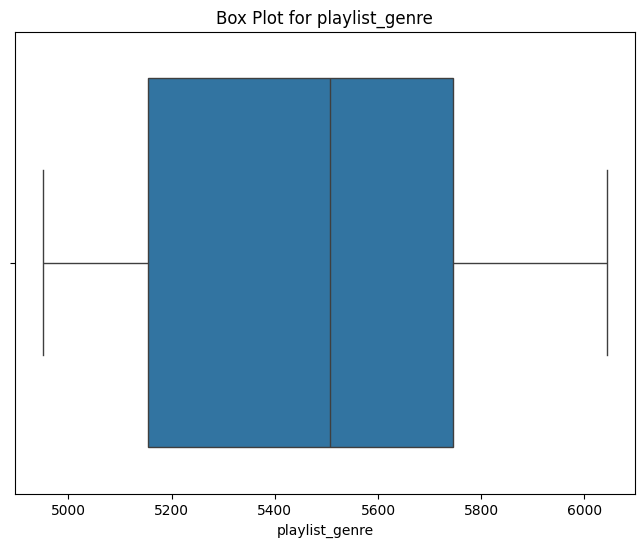

Column: playlist_subgenre
Number of outliers: 0
Percentage of outliers: 0.00%



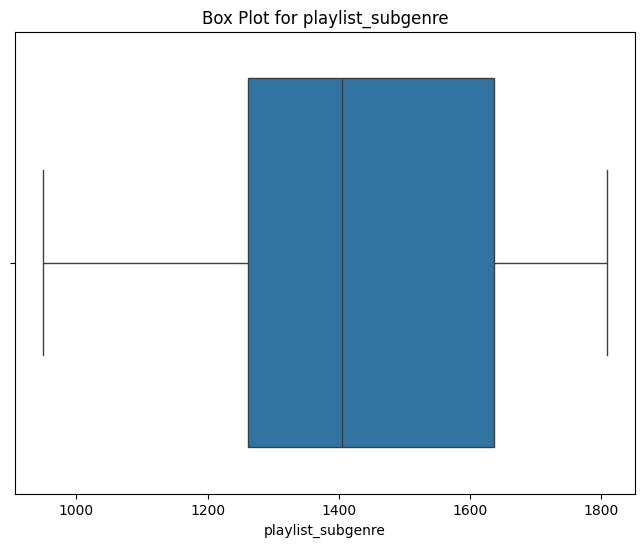

In [593]:
for column in numeric_values:
    Q1 = songs[column].quantile(0.25)
    Q3 = songs[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers using the lower and upper bounds
    outliers = songs[(songs[column] < lower_bound) | (songs[column] > upper_bound)]

    # Calculate the percentage of outliers
    percentage_outliers = (len(outliers) / len(songs)) * 100

    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")

    # Optionally, you can visualize the outliers using a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=songs[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [594]:
songs['key'].value_counts()

key
1     4010
0     3454
7     3352
9     3027
11    2996
2     2827
5     2680
6     2670
8     2430
10    2273
4     2201
3      913
Name: count, dtype: int64

In [595]:
# Ucitavanje biblioteka i funkcija
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets

In [596]:
def standardizacija(x_train, x_test, numeric_feats, dummy_feats):
    # Save the original order of columns
    cols = x_train.columns
    
    # Standardize numeric features
    s = StandardScaler()
    s.fit(x_train[numeric_feats])
    
    x_train_std_numeric = s.transform(x_train[numeric_feats])
    x_test_std_numeric = s.transform(x_test[numeric_feats])
    
    x_train_std_numeric = pd.DataFrame(x_train_std_numeric, columns=numeric_feats)
    x_test_std_numeric = pd.DataFrame(x_test_std_numeric, columns=numeric_feats)

    # Concatenate standardized numeric features with dummy features
    x_train_std = pd.concat([x_train_std_numeric, x_train[dummy_feats]], axis=1)
    x_test_std = pd.concat([x_test_std_numeric, x_test[dummy_feats]], axis=1)

    return x_train_std_numeric, x_test_std_numeric

In [597]:
def model_evaluation(y_test, y_predicted, N, d):
    mse = np.mean((y_test-y_predicted)**2)
    # mse = mean_squared_error(y_test,y_predicted)
    mae = np.mean(np.abs(y_test-y_predicted))
    # mae = mean_absolute_error(y_test,y_predicted)
    rmse = np.sqrt(mse)
    r2 = 1-np.sum((y_test-y_predicted)**2)/np.sum((y_test-np.mean(y_test))**2)
    # r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-((1-r2)*(N-1))/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)

    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y_test.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))
    return mse,mae,rmse,r2,r2_adj

In [598]:
# podela skupa na trening i test podatke
x_train_1, x_test, y_train_1, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, test_size=0.05, random_state=42)

x_train_std, x_val_std = standardizacija(x_train, x_val, numerical_feats, dummy_feats)



[ 0.03116549  1.51857003 -0.9456375   0.69439251 -0.17973516 -1.51173923] [5507 6043 5155 5746 5431 4951]


In [599]:
print(len(songs['playlist_genre'].unique()), len(songs['playlist_subgenre'].unique()), len(songs['key'].unique()))
x_train.head()

6 24 12


,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,year,month,day
2419,5507,1129,0.644,0.753,6,-4.296,1,0.0391,0.02790,0.1080,0.2090,117.148,211773,2003,6,24
4599,5507,1672,0.593,0.872,1,-4.525,0,0.0959,0.07840,0.2860,0.5230,91.964,208000,2013,5,28
29326,6043,1206,0.369,0.935,7,-5.071,1,0.6240,0.00011,0.0862,0.2640,174.293,187593,2016,11,17
17394,5155,1288,0.600,0.688,5,-8.339,0,0.2010,0.15900,0.4090,0.0793,99.977,156600,2017,6,30
19883,5155,1656,0.853,0.699,1,-4.282,0,0.0473,0.07190,0.0684,0.6800,96.013,197293,2018,12,2
